In [1]:

import torch
from IPython.core.interactiveshell import InteractiveShell

from dataloader import get_dataloader

# 假设 UNet 和 get_dataloader 已经定义
from models import UNet
from trainer import Trainer

InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = "retina"

In [ ]:
# 配置参数
data_folder = "./data/"
csv_file = "./data/group_split.csv"

batch_size = 4
lr = 1e-4
epochs = 100
patience = 10
checkpoint_dir = "./checkpoints"
debug = False

# 获取数据加载器
train_loader = get_dataloader(data_folder, csv_file, "train", batch_size, debug)
val_loader = get_dataloader(data_folder, csv_file, "val", batch_size, debug)
test_loader = get_dataloader(data_folder, csv_file, "test", batch_size, debug)

# 设备设置
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# 模型初始化
model = UNet(n_channels=3, n_classes=1)

criterion = torch.nn.BCEWithLogitsLoss()
optimizer_class = torch.optim.Adam
scheduler_class =  torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_kwargs = {
    "mode": "min",  # 监控验证损失的最小值
    "factor": 0.1,  # 学习率衰减因子
    "patience": 2,  # 耐心值
    "verbose": True,  # 打印学习率更新信息
}

# 初始化 Trainer
trainer = Trainer(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    device=device,
    lr=lr,
    epochs=epochs,
    patience=patience,
    checkpoint_dir=checkpoint_dir,
    criterion=criterion,  # 传入损失函数
    optimizer_class=optimizer_class,  # 传入优化器类
    scheduler_class=scheduler_class,  # 传入学习率调度器类
    scheduler_kwargs=scheduler_kwargs,  # 传入学习率调度器参数
)

# 训练和测试
trainer.train()
trainer.test()

Validation: 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]


Epoch 1/2, Train Loss: 1.4836, Val Loss: 1.6308, LR: 0.000100
Validation Metrics: {'precision': 0.0, 'recall': 0.0, 'specificity': 0.9999999999999787, 'accuracy': 0.9744613979232832, 'dice': 0.0, 'iou': 0.0, 'loss': 1.6308109362920125}
Best model saved with val loss: 1.6308


Validation: 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]


Epoch 2/2, Train Loss: 1.4454, Val Loss: 1.6159, LR: 0.000100
Validation Metrics: {'precision': 0.0, 'recall': 0.0, 'specificity': 0.9999999999999787, 'accuracy': 0.9744613979232832, 'dice': 0.0, 'iou': 0.0, 'loss': 1.6159083843231201}
Best model saved with val loss: 1.6159
Last model saved.


Validation: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]

Test Loss: 1.6203
Test Metrics: {'precision': 0.0, 'recall': 0.0, 'specificity': 0.9999999999999788, 'accuracy': 0.9778954109182194, 'dice': 0.0, 'iou': 0.0, 'loss': 1.6203440427780151}


{'precision': 0.0,
 'recall': 0.0,
 'specificity': 0.9999999999999788,
 'accuracy': 0.9778954109182194,
 'dice': 0.0,
 'iou': 0.0,
 'loss': 1.6203440427780151}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


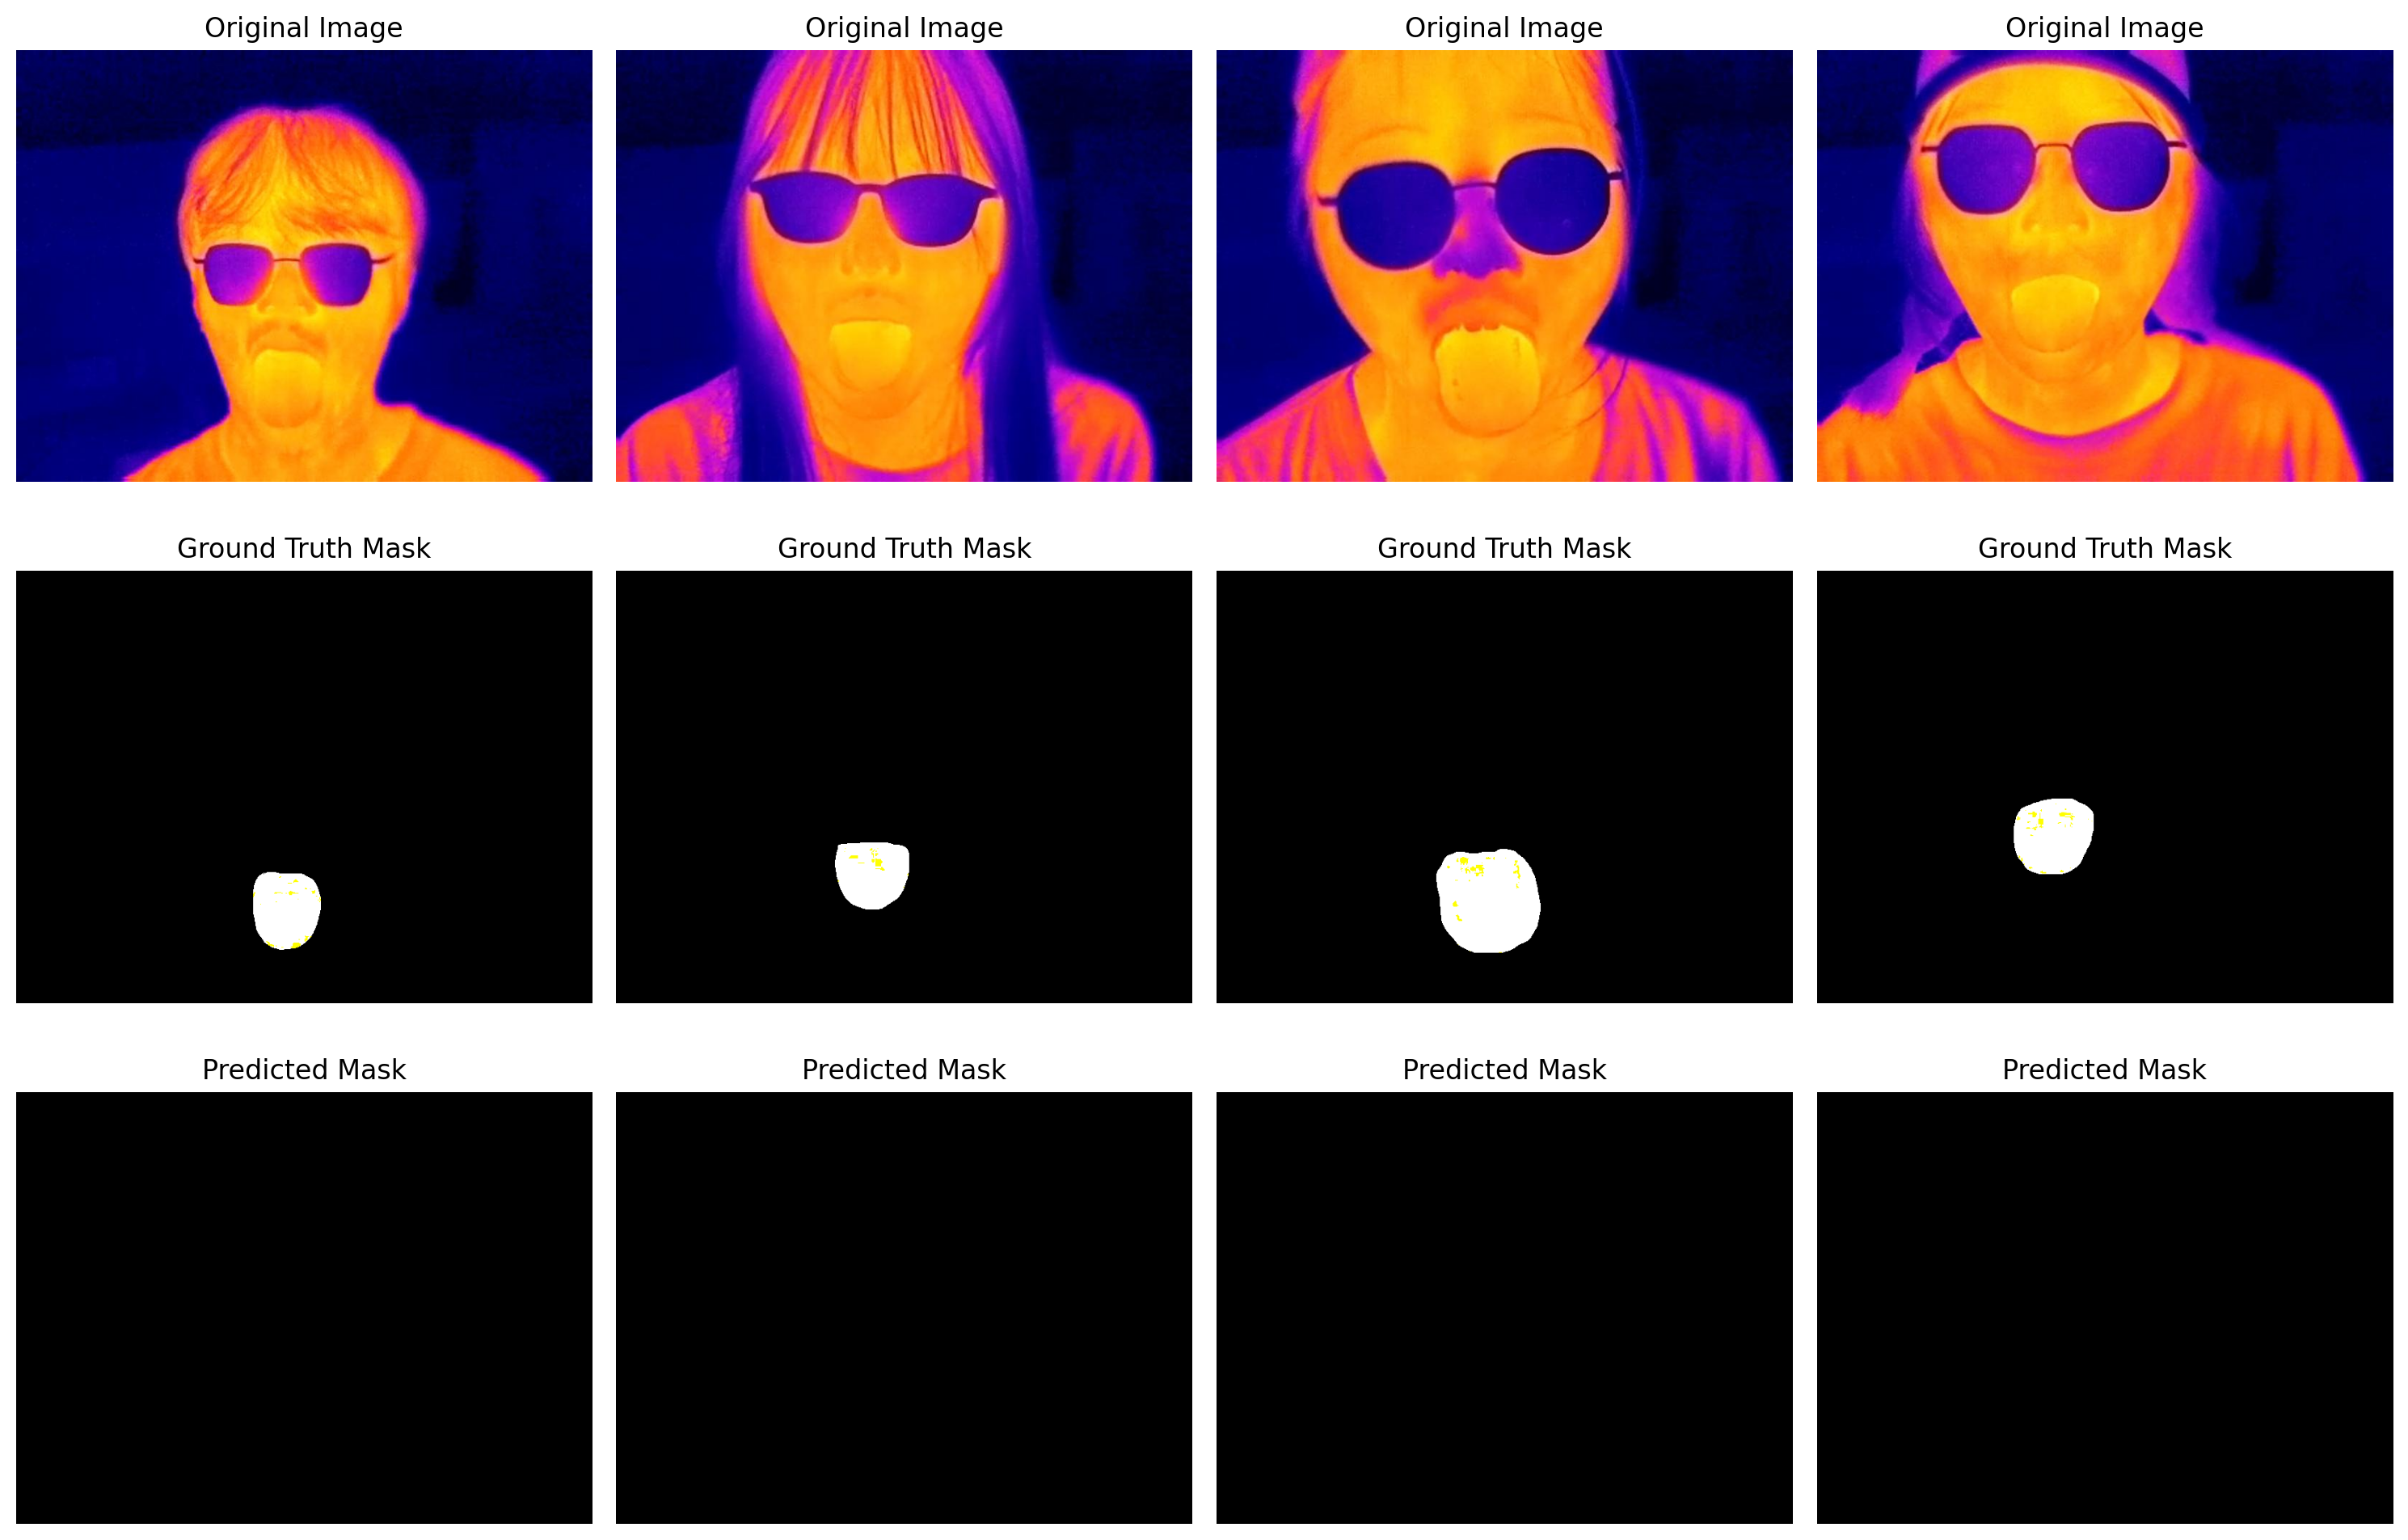

In [3]:
trainer.visualize_predictions("best_model.pth")